# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [3]:
matches.shape

(756, 14)

In [4]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration only KKR VS RCB matches

In [7]:
RK =matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Royal Challengers Bangalore'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Royal Challengers Bangalore'))]

In [9]:
RK.shape

(24, 14)

In [10]:
RK.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [11]:
RK.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,24.0,14.916667,33.612778,0.0,0.0,0.0,6.25,140.0
win_by_wickets,24.0,4.000000,3.216804,0.0,0.0,5.0,6.25,9.0


## HEAD TO HEAD

In [12]:
RK.groupby("winner")["winner"].count()

winner
Kolkata Knight Riders          14
Royal Challengers Bangalore    10
Name: winner, dtype: int64

Text(0.5, 1.0, 'KKR VS RCB-head to head')

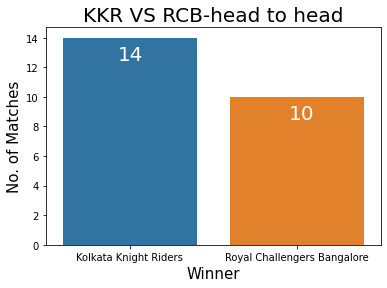

In [17]:
sns.countplot(RK["winner"])
plt.text(-0.07,12.5,str(RK['winner'].value_counts()['Kolkata Knight Riders']),size=20,color='white')
plt.text(0.95,8.5,str(RK['winner'].value_counts()['Royal Challengers Bangalore']),size=20,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('No. of Matches',fontsize=15)
plt.title('KKR VS RCB-head to head',fontsize = 20)

In [19]:
Season_wise_Match_Winner = pd.DataFrame(RK.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between KKR VS RCB :")
Season_wise_Match_Winner

Season wise winner of matches between KKR VS RCB :


winner count
season winner                                   
2008   Kolkata Knight Riders                   2
2009   Royal Challengers Bangalore             2
2010   Kolkata Knight Riders                   1
       Royal Challengers Bangalore             1
2011   Royal Challengers Bangalore             2
2012   Kolkata Knight Riders                   2
2013   Kolkata Knight Riders                   1
       Royal Challengers Bangalore             1
2014   Kolkata Knight Riders                   2
2015   Royal Challengers Bangalore             2
2016   Kolkata Knight Riders                   1
       Royal Challengers Bangalore             1
2017   Kolkata Knight Riders                   2
2018   Kolkata Knight Riders                   2
2019   Kolkata Knight Riders                   1
       Royal Challengers Bangalore             1

## Winning Percentage

In [24]:
Winning_Percentage = RK['winner'].value_counts()/len(RK['winner'])

In [25]:
print("KKR winning percentage against RCB(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("RCB winning percentage against KKR(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

KKR winning percentage against RCB(overall) : 58%
RCB winning percentage against KKR(overall) : 42%


In [26]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [28]:
performance("Kolkata Knight Riders",RK)

Number of times given team win while defending : 7
Number of times given team win while chasing   : 7

Average runs by which a given team wins while defending  :  50.0
Average wickets by which a given team wins while chasing :  5.0


In [29]:
performance('Royal Challengers Bangalore',RK)

Number of times given team win while defending : 1
Number of times given team win while chasing   : 9

Average runs by which a given team wins while defending  :  10.0
Average wickets by which a given team wins while chasing :  6.0


 Above Performance analysis give a breif overview of dominance of KKR over RCB. But we can also see a clear chasing dominance of RCB when they win matches

## Toss Analysis

In [30]:
Toss_Decision = pd.DataFrame(RK.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner                 toss_decision               
Kolkata Knight Riders       bat                        3
                            field                      8
Royal Challengers Bangalore field                     13

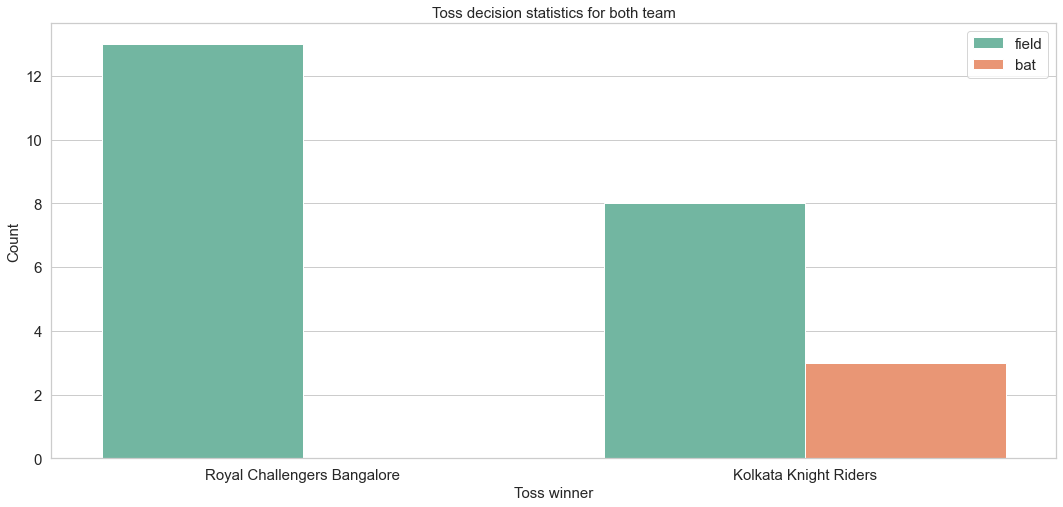

In [31]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(RK['toss_winner'],palette='Set2',hue=RK['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [32]:
Toss_Decision_based_Winner = pd.DataFrame(RK.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner                 toss_decision winner                             
Kolkata Knight Riders       bat           Kolkata Knight Riders             2
                                          Royal Challengers Bangalore       1
                            field         Kolkata Knight Riders             7
                                          Royal Challengers Bangalore       1
Royal Challengers Bangalore field         Kolkata Knight Riders             5
                                          Royal Challengers Bangalore       8

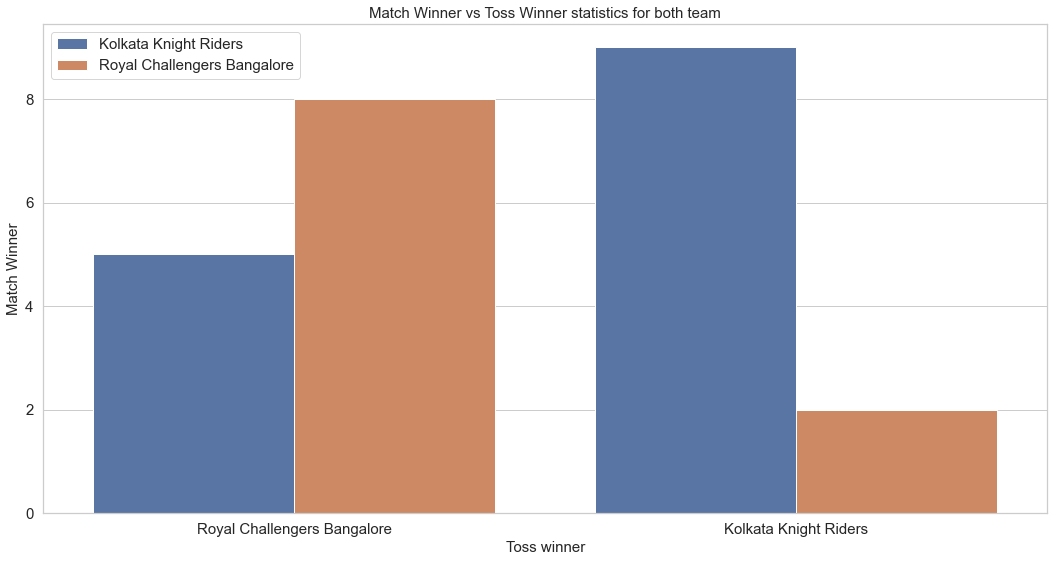

In [33]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RK['toss_winner'],hue=RK['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :


In [44]:
KKR = RK[RK["toss_winner"]=="Kolkata Knight Riders"]
RCB = RK[RK["toss_winner"]=="Royal Challengers Bangalore"]

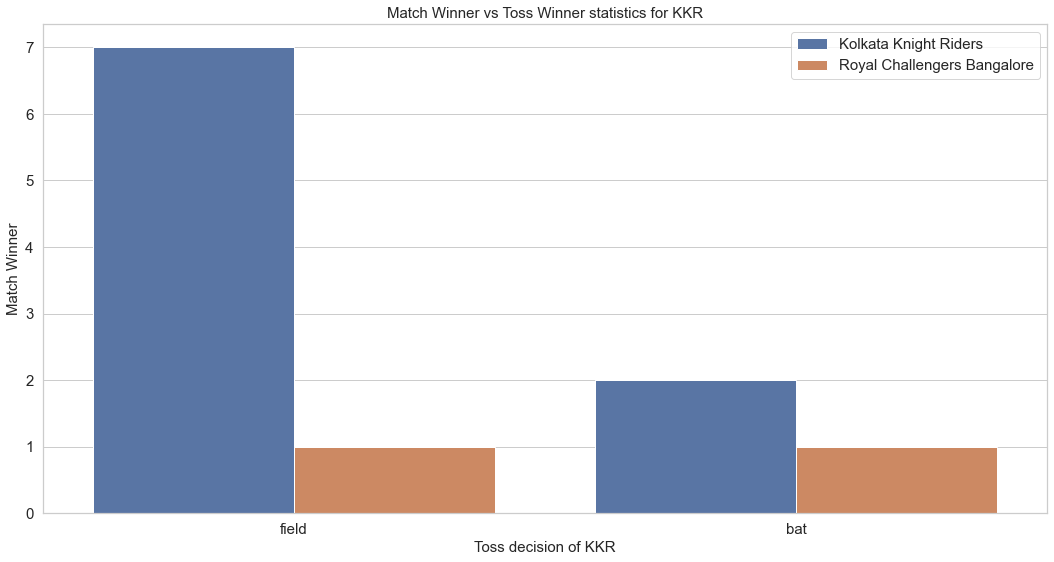

In [45]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KKR['toss_decision'],hue=KKR['winner'])
plt.title('Match Winner vs Toss Winner statistics for KKR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KKR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

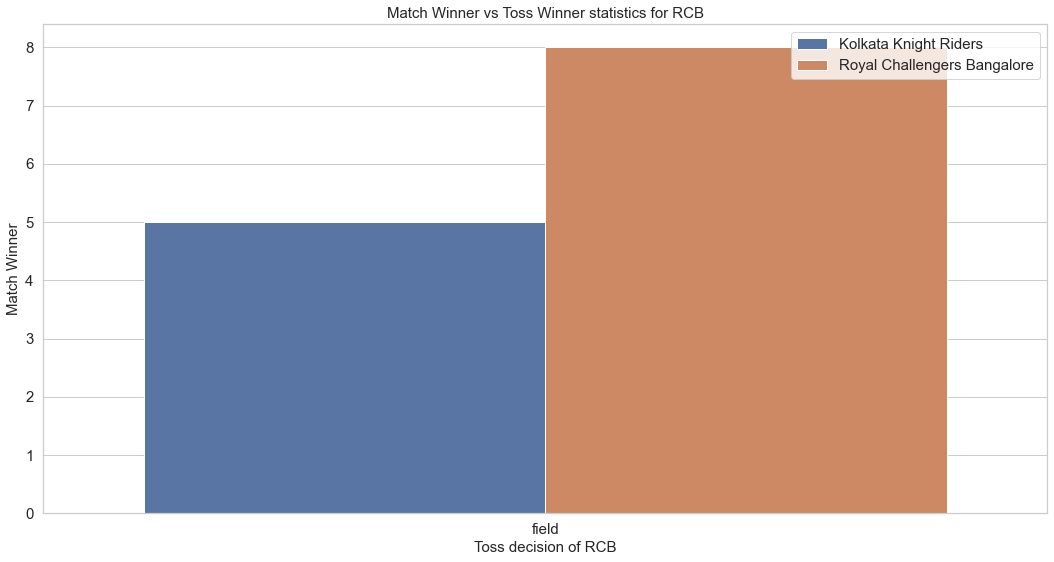

In [46]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(RCB['toss_decision'],hue=RCB['winner'])
plt.title('Match Winner vs Toss Winner statistics for RCB',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of RCB',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [47]:
player_of_the_match = pd.DataFrame(RK.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
CH Gayle,4
CA Lynn,2
SP Narine,2
V Kohli,2
AD Russell,2
G Gambhir,1
Mandeep Singh,1
LRPL Taylor,1
R Vinay Kumar,1
NM Coulter-Nile,1


### Recent Year Performance Analysis


In [48]:
cond1 = RK["season"] == 2017
cond2 = RK["season"] == 2018
cond3 = RK["season"] == 2019
final = RK[cond1 | cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens
45,2017,Bangalore,2017-05-07,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,M Chinnaswamy Stadium
7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens
7922,2018,Bengaluru,29/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,CA Lynn,M Chinnaswamy Stadium
11153,2019,Bengaluru,05/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,5,AD Russell,M. Chinnaswamy Stadium
11326,2019,Kolkata,19/04/19,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Royal Challengers Bangalore,10,0,V Kohli,Eden Gardens


In [49]:
final.shape

(6, 14)

In [50]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
SP Narine,2
V Kohli,1
NM Coulter-Nile,1
CA Lynn,1
AD Russell,1


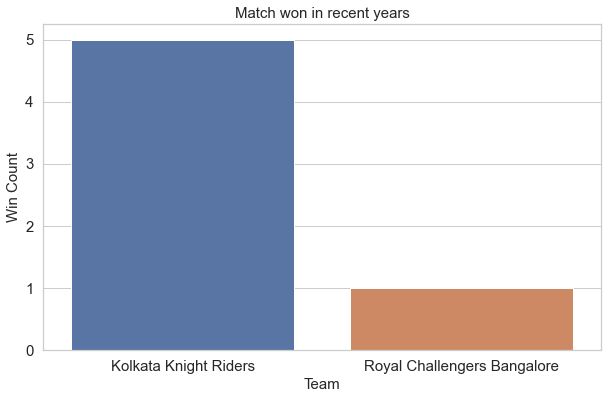

In [51]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

From all the above analysis related to head to head , toss based decision etc we can predict KKR to be favorite for this match